In [1]:
import numpy as np

import getpass
user = getpass.getuser()

In [2]:
from PIL import Image

In [3]:
from omni.isaac.kit import SimulationApp

# "/home/yizhou/Research/OpenAnyDrawer/scene0.usd" # 
usd_path = f"omniverse://localhost/Users/{user}/data_analysis.usd"


simulation_app = SimulationApp({"headless": True, "open_usd": usd_path,  "livesync_usd": usd_path}) 


Starting kit application with the fillowing args:  ['/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts/omni.isaac.kit/omni/isaac/kit/simulation_app.py', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps/omni.isaac.sim.python.kit', '--/app/tokens/exe-path=/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit', '--/persistent/app/viewport/displayOptions=3094', '--/rtx/materialDb/syncLoads=True', '--/rtx/hydra/materialSyncLoads=True--/omni.kit.plugin/syncUsdLoads=True', '--/app/renderer/resolution/width=1280', '--/app/renderer/resolution/height=720', '--/app/window/width=1440', '--/app/window/height=900', '--/renderer/multiGpu/enabled=True', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/exts', '--ext-folder', '/home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/apps', '--portable', '--no-window']
Passing the following args to the base kit application:  ['-f', '/home/yizhou/.local/share/jupyter/runtime/kernel-fe17097d-77f0-4266-8e69-b069aaab9405.json

OmniAssetFileFormat
2022-08-18 03:22:58 [1,828ms] [Error] [rtx.neuraylib.plugin] [DYNLIB:IO]   0.1   DYNLIB io   error: /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so: cannot open shared object file: No such file or directory
2022-08-18 03:22:58 [1,828ms] [Error] [rtx.neuraylib.plugin] [INDEX:MAIN]   0.1   INDEX  main error: Failed to load /home/yizhou/.local/share/ov/pkg/isaac_sim-2022.1.0/kit/python/bin/libs/iray/libnvindex.so


[1.516s] [ext: omni.mdl-0.1.0] startup
[1.535s] [ext: omni.kit.menu.create-1.0.2] startup
[1.536s] [ext: omni.kit.window.file_exporter-1.0.4] startup
[1.537s] [ext: omni.kit.window.drop_support-1.0.0] startup
[1.538s] [ext: omni.kit.material.library-1.3.10] startup
[1.541s] [ext: omni.kit.window.property-1.6.3] startup
[1.542s] [ext: omni.kit.context_menu-1.3.9] startup
[1.545s] [ext: omni.kit.window.file_importer-1.0.4] startup
[1.546s] [ext: omni.kit.stage_templates-1.1.2] startup
[1.548s] [ext: omni.kit.widget.stage-2.6.15] startup
[1.551s] [ext: omni.kit.window.file-1.3.16] startup
[1.553s] [ext: omni.debugdraw-0.1.0] startup
[1.559s] [ext: omni.kit.window.content_browser-2.4.28] startup
[1.570s] [ext: omni.kit.widget.prompt-1.0.1] startup
[1.570s] [ext: omni.kit.property.usd-3.14.8] startup
[1.604s] [ext: omni.hydra.engine.stats-1.0.0] startup
[1.610s] [ext: omni.kit.widget.settings-1.0.0] startup
[1.612s] [ext: omni.graph.tools-1.3.5] startup
[1.676s] [ext: omni.graph.core-2.27.0

In [4]:
from omni.isaac.core import World
world = World()

In [5]:
from open_env import OpenEnv

env = OpenEnv()

In [6]:
env.add_camera()
env.setup_viewport()

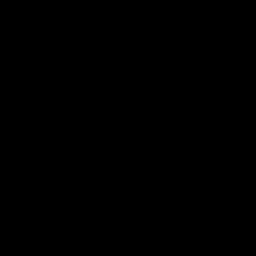

In [7]:
world.render()
env.get_image()

In [8]:
from task.checker import TaskChecker
from task.instructor import SceneInstructor

In [9]:
from omni.isaac.core.prims.xform_prim import XFormPrim

In [18]:
OBJ_INDEX_LIST = ['0', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', '26', '27', '28', '29', '30', '31', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '50', '51', '52', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64', '65', '66', '68', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '105', '106', '107', '108', '110', '111', '112', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '134', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '149', '151', '152', '153', '154', '156', '157', '158', '159', '160', '162', '163', '164', '165', '168', '169', '170', '171', '172', '173', '175', '176', '177', '179', '180', '182', '183', '184', '185', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197']

In [21]:
OBJ2Handle = {}

In [22]:
len(OBJ_INDEX_LIST)

174

In [24]:
for obj_id in OBJ_INDEX_LIST:
    print(obj_id)
        
    env.add_object(int(obj_id), scale = 0.1)

    mobility_obj = XFormPrim("/World/Game/mobility")
    mobility_obj_name = mobility_obj.name

    world.scene.add(mobility_obj)

    scene_instr = SceneInstructor()
    scene_instr.analysis()

    OBJ2Handle[obj_id] = scene_instr.valid_handle_list
    
    world.scene.remove_object(mobility_obj_name)

0
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
3
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', '

9
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_30/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_23/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_16/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_3/visuals/handle_9/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_30': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}, '/World/Game/mobility/link_1/visuals/handle_23': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_

19
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_6/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_6': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'horizontal'}}
20
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_6/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_25/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_6': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}, 

physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'vertical'}}
33
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_20/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_21/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_22/physicsMaterial
add 

analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_5': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
39
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_8/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_10': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'vertical'}, '/World/Game/mobility/link_1/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '

physics material: path:  /World/Game/mobility/link_0/visuals/handle_6/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_6': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'vertical'}}
54
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_10': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joi

analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_5': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
62
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_15/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_13/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_15': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'horizontal'}, '/World/Game/mobility/link_1/visuals/handle_13': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_descripti

physics material: path:  /World/Game/mobility/link_0/visuals/handle_6/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_6': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'horizontal'}}
74
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_1/visuals/handle_5/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_5': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
75
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_12/physicsMaterial
add physics material to handle
phy

physics material: path:  /World/Game/mobility/link_0/visuals/handle_11/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_12/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_10': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'vertical'}}
88
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_1/visuals/handle_35/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_36/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_37/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_26/physicsMaterial
a

95
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_32/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_30/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_23/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_3/visuals/handle_8/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_32': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'vertical'}, '/World/Game/mobility/link_1/visuals/handle_30': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game

physics material: path:  /World/Game/mobility/link_1/visuals/handle_16/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_17/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_15': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
102
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_7/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_9': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 

physics material: path:  /World/Game/mobility/link_2/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_23': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'horizontal'}, '/World/Game/mobility/link_1/visuals/handle_15': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'horizontal'}, '/World/Game/mobility/link_2/visuals/handle_8': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer

122
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_10': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'horizontal'}}
123
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_7/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description'

loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_7/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_9': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}, '/World/Game/mobility/link_1/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'left', 'direction': 'horizontal'}}
131
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_14/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mob

143
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_5/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_5': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
144
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_1/visuals/handle_5/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_6/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_7/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_5': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description':

physics material: path:  /World/Game/mobility/link_0/visuals/handle_18/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_16/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_9/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_18': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}, '/World/Game/mobility/link_1/visuals/handle_16': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'left', 'direction': 'horizontal'},

160
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_6/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_7/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_8/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'd

physics material: path:  /World/Game/mobility/link_0/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_10/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_6/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_7/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_8/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'left', 'direction': 'vertical'}, '/World/Game/mobility/l

analysis_spatial_rel:  {'/World/Game/mobility/link_1/visuals/handle_5': {'joint_type': 'PhysicsRevoluteJoint', 'cabinet_type': 'door', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_1', 'relative_to_game_center': 'right', 'direction': 'vertical'}}
183
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_24/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_25/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_16/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_17/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_8/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_2/visuals/handle_9/physicsMaterial
add

191
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_5/physicsMaterial
add physics material to handle
analysis_spatial_rel:  {'/World/Game/mobility/link_0/visuals/handle_5': {'joint_type': 'PhysicsPrismaticJoint', 'cabinet_type': 'drawer', 'vertical_description': '', 'horizontal_description': '', 'joint': 'joint_0', 'relative_to_game_center': 'right', 'direction': 'horizontal'}}
192
add object
loading asset from omni nucleus
physics material: path:  /World/Game/mobility/link_0/visuals/handle_11/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_12/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_0/visuals/handle_13/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/mobility/link_1/visuals/handle_9/physicsMaterial
add physics material to handle
physics material: path:  /World/Game/m

In [19]:
# reset scene
import omni
mobility_prim = world.scene.stage.GetPrimAtPath("/World/Game/mobility")
if mobility_prim:
    omni.kit.commands.execute("DeletePrims", paths=["/World/Game/mobility"])

In [20]:
world.reset()

In [25]:
# Data analysis

In [27]:
OBJ2Handle

174

In [28]:
import json

result_file_path = "/home/yizhou/Research/Data/data_analysis.json"

with open(result_file_path, 'w') as fp:
    json.dump(OBJ2Handle, fp)

In [30]:
handle_freq = [len(v) for k, v in OBJ2Handle.items()]

In [42]:
OBJ2Handle

{'0': {'/World/Game/mobility/link_0/visuals/handle_7': {'joint_type': 'PhysicsRevoluteJoint',
   'cabinet_type': 'door',
   'vertical_description': '',
   'horizontal_description': '',
   'joint': 'joint_0',
   'relative_to_game_center': 'right',
   'direction': 'horizontal'}},
 '3': {'/World/Game/mobility/link_0/visuals/handle_8': {'joint_type': 'PhysicsRevoluteJoint',
   'cabinet_type': 'door',
   'vertical_description': '',
   'horizontal_description': '',
   'joint': 'joint_0',
   'relative_to_game_center': 'right',
   'direction': 'horizontal'}},
 '4': {'/World/Game/mobility/link_0/visuals/handle_32': {'joint_type': 'PhysicsRevoluteJoint',
   'cabinet_type': 'door',
   'vertical_description': 'bottom',
   'horizontal_description': 'right',
   'joint': 'joint_0',
   'relative_to_game_center': 'right',
   'direction': 'horizontal'},
  '/World/Game/mobility/link_1/visuals/handle_30': {'joint_type': 'PhysicsRevoluteJoint',
   'cabinet_type': 'door',
   'vertical_description': 'bottom'

In [31]:
# number of tasks
sum(handle_freq)

372

In [35]:
from collections import Counter

In [37]:
c = Counter(handle_freq)

In [38]:
c

Counter({1: 76, 4: 31, 3: 18, 2: 44, 6: 5})

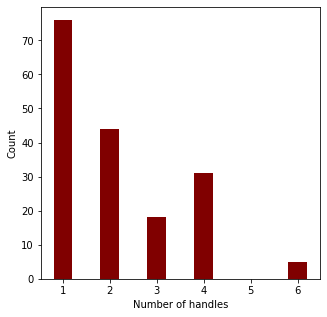

In [41]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = c
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Number of handles")
plt.ylabel("Count")
# plt.title("Students enrolled in different courses")
plt.show()

In [45]:
handle_list = [v for k, v in OBJ2Handle.items()]

In [48]:
joint_types = [item for sublist in [[v["joint_type"] for k,v in e.items()] for e in handle_list] for item in sublist] 

In [50]:
Counter(joint_types)

Counter({'PhysicsRevoluteJoint': 205, 'PhysicsPrismaticJoint': 167})

In [51]:
handle_direction = [item for sublist in [[v["direction"] for k,v in e.items()] for e in handle_list] for item in sublist] 

In [52]:
Counter(handle_direction)

Counter({'horizontal': 235, 'vertical': 137})

In [53]:
joint_handle_direction = [item for sublist in [[v["direction"] + v["joint_type"] for k,v in e.items()] for e in handle_list] for item in sublist] 

In [55]:
Counter(joint_handle_direction)

Counter({'horizontalPhysicsRevoluteJoint': 74,
         'horizontalPhysicsPrismaticJoint': 161,
         'verticalPhysicsRevoluteJoint': 131,
         'verticalPhysicsPrismaticJoint': 6})